In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
import numpy as np


In [ ]:
df = pd.read_csv(r'train_data_cross-sell.csv', encoding='latin1')

#now, rename the column
df.rename(columns={'ÿid': 'id'}, inplace=True)

df.value_counts()

In [ ]:
#step 1: calculate performance scores (premium and agent name)

df = pd.read_csv(r'train_data_cross-sell.csv', encoding='latin1')

performance_scores = df.groupby('Agent_name')['Annual_premium'].sum().reset_index(name='performance_score')

#step  2: merge performance scores back into the original dataframe

df = df.merge(performance_scores,on='Agent_name')

#step 3: define performance categories based on quartiles as an example

performance_quartiles = df['performance_score'].quantile([0.25, 0.5, 0.75]).to_dict()


#step 4: function to categorize agents based on performance quartiles

def categorize_performance(score):
    if score <= performance_quartiles[0.25]:
        return 'Low'
    elif score > performance_quartiles[0.25] and score <= performance_quartiles[0.5]:
        return 'Medium'
    elif score > performance_quartiles[0.5] and score <= performance_quartiles[0.75]:
        return 'High'
    else:
        return 'Very High'
    
#step 5: Apply the categorisation function to the performance score column

df['agent_performance_category'] = df['performance_score'].apply(categorize_performance)

agents = df['Agent_name']

#step 6: Drop the agentid and performance_score columns if no longer needed

df = df.drop(['Agent_name', 'performance_score'], axis=1)

df.head()


# Daily Assignment

Q1. Differentiate between precision and recall.


precision focuses on minimizing false positives, while recall focuses on minimizing false negatives.
Precision can be seen as a measure of quality, and recall as a measure of quantity.

Q2. Between false negatives and false positives what is a type I error and a type II.

A type I error is a false positive, while a type II error is a false negative.




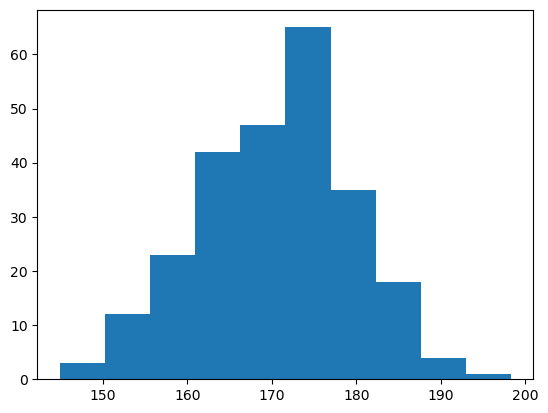

In [ ]:


x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.show() 